In [ ]:
import os
import pickle
import os.path as osp
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
methods = ['lasso', 'rs']
input_dims = [100, 1000, 10000, 100000]
output_dims = [1, 100]
alphas = [1, 2, 3, 4, 5]
zr_ratios = [0.75, 0.9, 0.99, 0.999, 1]
zr_alphas = [0.2, 0.4, 0.6, 0.8, 1.0]

In [4]:
def get_rs_min_time(input_dim, output_dim, alpha, criteria):
    folder = osp.join('output/HighDimLinearRegression', f'{input_dim}_{output_dim}')
    min_time = None
    for fn in os.listdir(folder):
        if 'rs' in fn and not fn.endswith('.csv') and fn.startswith(f'{alpha}-'):
            print(fn)
            fp = osp.join(folder, fn)
            t = None
            with open(fp, 'rt') as f:
                for line in f.readlines():
                    record = json.loads(line)
                    if record[criteria]:
                        t = record['time']
                        break

    if min_time:
        min_time = min(min_time, t)
    else:
        min_time = t
    return min_time

def get_rs_min_loss(input_dim, output_dim, alpha, criteria):
    folder = osp.join('output/HighDimLinearRegression', f'{input_dim}_{output_dim}')
    min_time = None
    for fn in os.listdir(folder):
        if 'rs' in fn and not fn.endswith('.csv') and fn.startswith(f'{alpha}-'):
            print(fn)
            fp = osp.join(folder, fn)
            t = None
            with open(fp, 'rt') as f:
                for line in f.readlines():
                    record = json.loads(line)
                    if record[criteria]:
                        t = record['total']
                        break

    if min_time:
        min_time = min(min_time, t)
    else:
        min_time = t
    return min_time

def get_lasso_time(input_dim, output_dim, alpha):
    folder = osp.join('output/HighDimLinearRegression', f'{input_dim}_{output_dim}')
    min_time = None
    for fn in os.listdir(folder):
        if 'lasso' in fn:
            fp = osp.join(folder, fn)
            df = pd.read_csv(fp)
            record = df[df.alpha==alpha].to_dict('list')
            t = record['time'][0]
    if min_time:
        min_time = min(min_time, t)
    else:
        min_time = t
    return min_time


def get_lasso_loss(input_dim, output_dim, alpha):
    folder = osp.join('output/HighDimLinearRegression', f'{input_dim}_{output_dim}')
    min_loss = None
    for fn in os.listdir(folder):
        if 'lasso' in fn:
            fp = osp.join(folder, fn)
            df = pd.read_csv(fp)
            record = df[df.alpha==alpha].to_dict('list')
            t = record['total'][0]
    if min_loss:
        min_loss = min(min_loss, t)
    else:
        min_loss = t
    return min_loss

1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_met

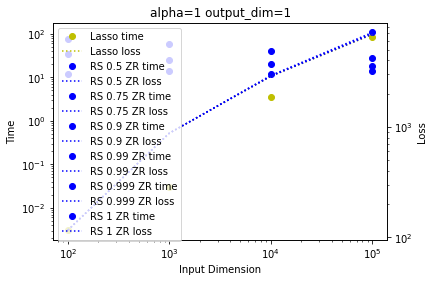

1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_metrics_optname_Adam_lr_0.01
1-rs_metrics_optname_SGD_lr_0.1
1-rs_metrics_optname_SGD_lr_0.01
1-rs_metrics_optname_Adam_lr_1.0
1-rs_metrics_optname_Adam_lr_0.1
1-rs_met

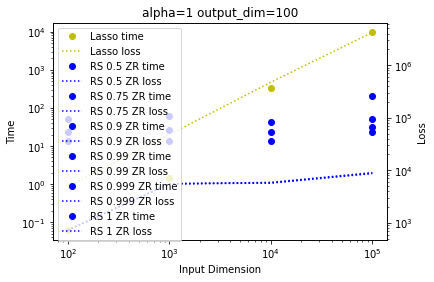

2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_met

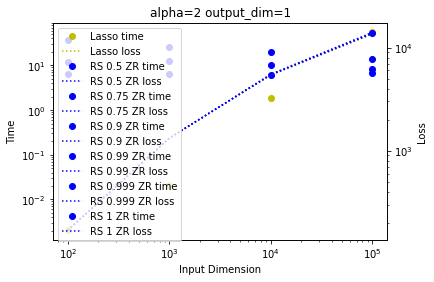

2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_metrics_optname_Adam_lr_0.01
2-rs_metrics_optname_SGD_lr_0.1
2-rs_metrics_optname_SGD_lr_0.01
2-rs_metrics_optname_Adam_lr_1.0
2-rs_metrics_optname_Adam_lr_0.1
2-rs_met

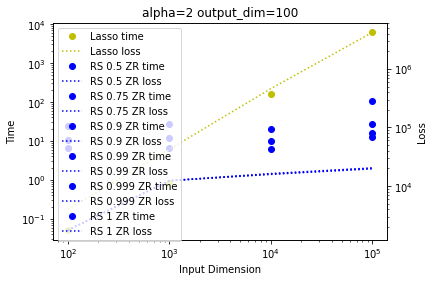

3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_met

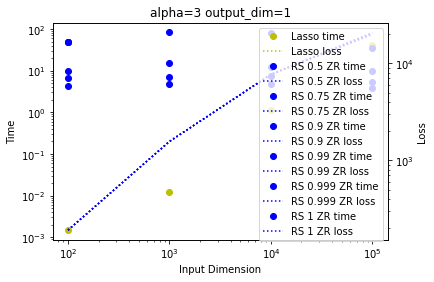

3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_metrics_optname_Adam_lr_0.01
3-rs_metrics_optname_SGD_lr_0.1
3-rs_metrics_optname_SGD_lr_0.01
3-rs_metrics_optname_Adam_lr_1.0
3-rs_metrics_optname_Adam_lr_0.1
3-rs_met

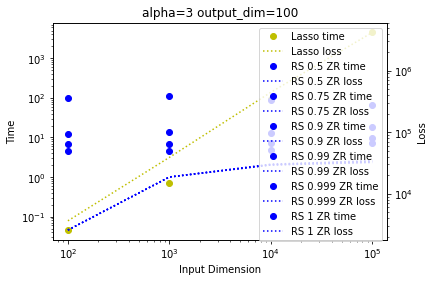

4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_met

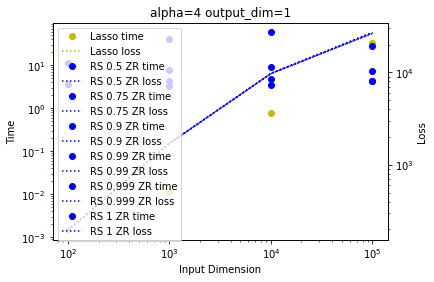

4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_metrics_optname_Adam_lr_0.01
4-rs_metrics_optname_SGD_lr_0.1
4-rs_metrics_optname_SGD_lr_0.01
4-rs_metrics_optname_Adam_lr_1.0
4-rs_metrics_optname_Adam_lr_0.1
4-rs_met

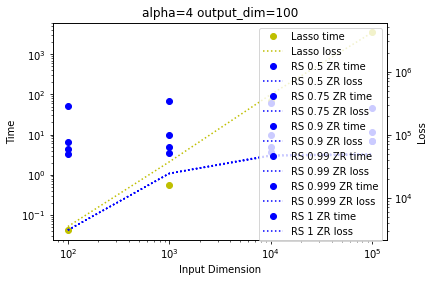

5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.1
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.1
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.1
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.1
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_met

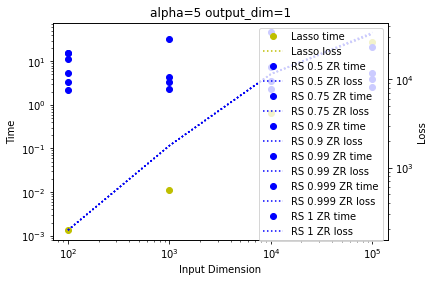

5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.1
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.1
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_metrics_optname_Adam_lr_1.0
5-rs_metrics_optname_Adam_lr_0.1
5-rs_metrics_optname_Adam_lr_0.01
5-rs_metrics_optname_SGD_lr_0.01
5-rs_

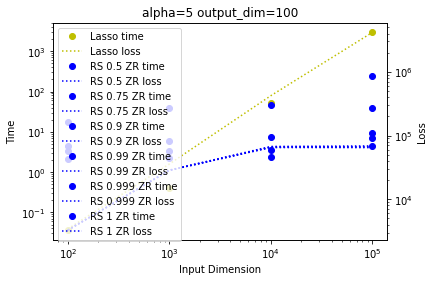

In [7]:
for a in alphas:
    for outdim in output_dims:
        fig, ax = plt.subplots()
        ax2 = ax.twinx()
        lnlist = []
        lblist = []
        
        x = input_dims
        y = [get_lasso_time(indim, outdim, a) for indim in input_dims]
        y2 = [get_lasso_loss(indim, outdim, a) for indim in input_dims]
        ln1, = ax.plot(x, y, "r")
        ln2, = ax2.plot(x, y2, "r-:")
        lnlist.append(ln1)
        lnlist.append(ln2)
        lblist.append(f"Lasso time")
        lblist.append(f"Lasso loss")

        for c, _a in zip(zr_ratios, zr_alphas):
            cri = f'zero_rate_greater_than_threshold:{c}'
            y = [get_rs_min_time(indim, outdim, a, cri) for indim in input_dims]
            y2 = [get_rs_min_loss(indim, outdim, a, cri) for indim in input_dims]
            ln1, = ax.plot(x, y, "b", alpha=_a)
            ln2, = ax2.plot(x, y2, "b-:", alpha=_a)
            lnlist.append(ln1)
            lnlist.append(ln2)
            lblist.append(f"RS {c} ZR time")
            lblist.append(f"RS {c} ZR loss") 
            

        ax.set_xlabel('Input Dimension')
        ax.set_ylabel('Time')
        ax.set_xscale('log')
        ax.set_yscale('log')
        plt.legend(lnlist, lblist)
        ax2.set_ylabel('Loss')
        ax2.set_yscale('log')
        ax.set_title(f'alpha={a} output_dim={outdim}')
        plt.show()